# Developing a 2D GAN to recognise and generate hand-written digits

In this notebook I will be creating a 2D GAN which will be used to create hand-written digits from 0-9. I will be using the M   

In [5]:

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor



In [6]:
training_steps = 50000    
samples = 200
epochs = 1000 #number of epochs
n = 100 #number of batches to be created
numb_input_layer = 5
training_steps = 50000    


In [7]:
'''transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])
    '''

'transform = transforms.Compose([\n    transforms.ToTensor(),\n    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])\n    '

Import the MNIST dataset and create our training dataset

In [8]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())

Import the MIST dataset and create our test dataset

In [9]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())


Below we can check the length of each of our training and test datasets.

In [10]:
len(mnist_trainset)

60000

In [11]:
len(mnist_testset)

10000

Now we can create our labels

In [12]:
labels_map = {
    0: "0 - Zero",
    1: "1 - One",
    2: "2 - Second",
    3: "3 - Three",
    4: "4 - Four",
    5: "5 - Five",
    6: "6 - Six",
    7: "7 - Seven",
    8: "8 - Eight",
    9: "9 - Nine",
}

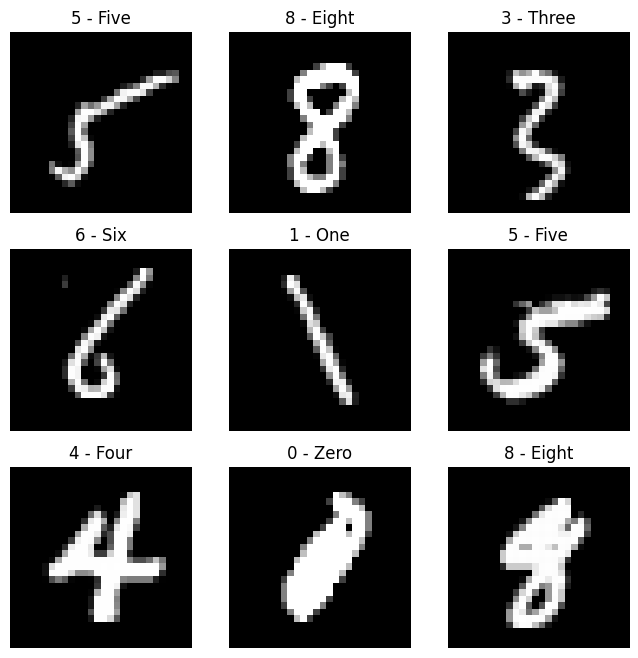

In [19]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [14]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=n, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=n, shuffle=False)

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


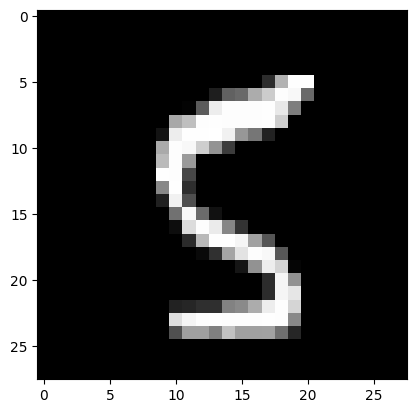

Label: 5


In [16]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        #hidden layer has 25 neurons
        self.fc1 = nn.Linear(2, 25)
        #output layer only has 1 neuron as it is either 1 or 0
        self.fc2 = nn.Linear(25,25)
        self.fc3 = nn.Linear(25,10)

    def forward(self,x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [18]:
discriminator = Discriminator()
# test a discriminator with a simple input - sanity check
x_data_test = torch.rand(2)
discriminator(x_data_test)

tensor([0.4823, 0.5253, 0.5239, 0.5431, 0.4835, 0.3978, 0.5061, 0.4710, 0.4971,
        0.4491], grad_fn=<SigmoidBackward0>)